In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

In [6]:
# Create inspector object
inspector = inspect(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# reflect the measurement table
meas_columns = inspector.get_columns('measurement')
for column in meas_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# reflect the station table
stat_columns = inspector.get_columns('station')
for column in stat_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
dates_ordered = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

In [13]:
# Convert query result to string
last_date = str(dates_ordered[0])
last_date

'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Convert the string type query result to datetime
last_date_dt = dt.datetime.strptime(last_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
year_ago = last_date_dt - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
# Perform a query to retrieve the data and precipitation scores
data_last_year = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > year_ago).\
        filter(Measurement.date <= last_date_dt).all()
data_last_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_last_year, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df_sort = df.sort_index()
df_sort

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


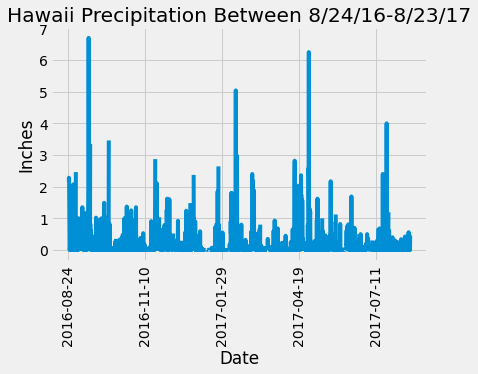

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = df_sort.plot(legend=False, xlabel="Date", ylabel="Inches", title="Hawaii Precipitation Between 8/24/16-8/23/17")

# rotate x ticks for visibility
plt.xticks(rotation = 90)
plt.show()

plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_mean = df_sort['precipitation'].mean()
precip_median = df_sort['precipitation'].median()
precip_mode = df_sort['precipitation'].mode()
precip_min = df_sort['precipitation'].min()
precip_max = df_sort['precipitation'].max()

print(f'The mean precipitation (in inches) for HI between 8/24/16-8/23/17 is: {precip_mean}')
print(f'The median precipitation (in inches) for HI between 8/24/16-8/23/17 is: {precip_median}')
print(f'The mode of precipitation (in inches) for HI between 8/24/16-8/23/17 is: {precip_mode[0]}')
print(f'The lowest precipitation (in inches) for HI between 8/24/16-8/23/17 is: {precip_min}')
print(f'The highest precipitation (in inches) for HI between 8/24/16-8/23/17 is: {precip_max}')

The mean precipitation (in inches) for HI between 8/24/16-8/23/17 is: 0.17646153846153778
The median precipitation (in inches) for HI between 8/24/16-8/23/17 is: 0.02
The mode of precipitation (in inches) for HI between 8/24/16-8/23/17 is: 0.0
The lowest precipitation (in inches) for HI between 8/24/16-8/23/17 is: 0.0
The highest precipitation (in inches) for HI between 8/24/16-8/23/17 is: 6.7


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).\
    count()
station_count

print(f'The total number of stations in the dataset is {station_count}.')

The total number of stations in the dataset is 9.


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_use = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_use

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# pull most active station into a variable for querying
most_active = station_use[0][0]
most_active

print(f'The most active station is {most_active}.')

The most active station is USC00519281.


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
popular_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
popular_station_stats

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Print summary temperature stats for most popular station
print(f'The minimum temperature for station USC00519281 is: {popular_station_stats[0][0]}')
print(f'The maximum temperature for station USC00519281 is: {popular_station_stats[0][1]}')
print(f'The average temperature for station USC00519281 is: {round(popular_station_stats[0][2], 2)}')

The minimum temperature for station USC00519281 is: 54.0
The maximum temperature for station USC00519281 is: 85.0
The average temperature for station USC00519281 is: 71.66


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
data_last_year = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == most_active).\
        filter(Measurement.date > year_ago).\
        filter(Measurement.date <= last_date_dt).all()
data_last_year

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [25]:
# Convert query results to Pandas df
df = pd.DataFrame(data_last_year, columns=["date", "temperature"])
df

,date,temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


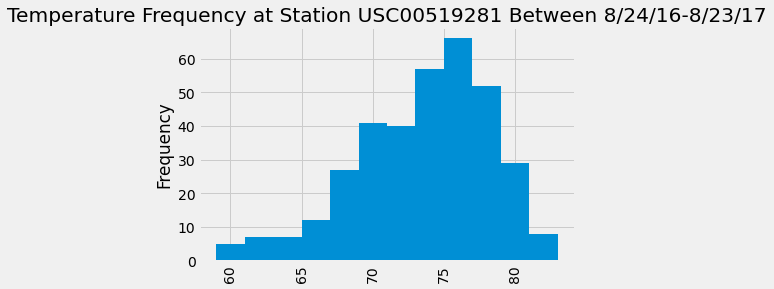

In [26]:
# plot the results as a histogram
ax = df.plot.hist(legend=False, title="Temperature Frequency at Station USC00519281 Between 8/24/16-8/23/17", bins=12)

# rotate x ticks for visibility
plt.xticks(rotation = 90)
plt.show()

# Close session

In [27]:
# Close Session
session.close()